In [1]:
import json
import requests
from requests_oauthlib import OAuth2Session
from oauthlib.oauth2 import BackendApplicationClient
import os
import time
from datetime import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

import matplotlib.pyplot as plt
%matplotlib inline

### OAuth Client Credentials Flow (App Access Token)

In [2]:
with open("/home/guzzo/Software/credentials/twitch_app.json") as f:
    tcrets = json.load(f)
    client_id = tcrets['client_id']
    client_secret = tcrets['client_secret']
    redirect_uri =  tcrets['redirect_uri']

In [3]:
client_id

'6duu729067jp5pbb45hrf00i057jo8'

Request token:

In [4]:
client = BackendApplicationClient(client_id=client_id)

oauth = OAuth2Session(
    client=client,
)

In [5]:
# [x for x in os.environ if ("TWITCH" in x)]
# token = dict(access_token=os.environ['TWITCH_ACCESS_TOKEN'])

In [34]:
token = oauth.fetch_token(
    "https://id.twitch.tv/oauth2/token",
    client_id=os.environ["TWITCH_CLIENT_ID"],
    client_secret=client_secret,
)
token

{'access_token': 'pz0uy0yu7japjqpguk1x3u53k28z2t',
 'expires_at': 1526223676.433162,
 'expires_in': 5005083}

In [37]:
oauth.

True

In [27]:
token['expires_in']

5426168

In [20]:
token['expires_in']/3600/24

64.23322916666667

In [21]:
token.keys()

dict_keys(['access_token', 'expires_in', 'expires_at'])

In [23]:
oauth.fetch_token

{'User-Agent': 'python-requests/2.18.4', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [28]:
def token_saver(token):
    with open("twitch_token.json", 'w') as f:
        json.dump(token, f, ensure_ascii=False)
token_saver(token)

In [12]:
datetime.isoformat(datetime.fromtimestamp(token['expires_at']))

'2018-05-19T10:47:11.575894'

### Query the API

#### Streams

In [13]:
# New Twitch API
headers = {"Authorization": "Bearer {} https://api.twitch.tv/helix/".format(token['access_token'])}
# # Twitch API v5
# headers = {"Authorization": "OAuth {} https://api.twitch.tv/kraken/".format(token['access_token'])}
params = {
    'first': 100, # Get the first 100 streams (It's the max value)
}
s_r = oauth.get("https://api.twitch.tv/helix/streams", headers=headers, params=params)

In [14]:
print(json.dumps(dict(s_r.headers), indent=4))

{
    "Content-Type": "application/json; charset=utf-8",
    "Server": "nginx",
    "Access-Control-Allow-Origin": "*",
    "Cache-Control": "no-cache, no-store, must-revalidate, private",
    "Expires": "0",
    "Pragma": "no-cache",
    "Ratelimit-Limit": "120",
    "Ratelimit-Remaining": "119",
    "Ratelimit-Reset": "1521212235",
    "Twitch-Trace-Id": "2c86044441342ae0a92788a1c154fff6",
    "X-Ctxlog-Logid": "1-5aabdb11-bdb67ec8aa3e72e474e55165",
    "Front-End-Https": "on",
    "Timing-Allow-Origin": "https://www.twitch.tv",
    "Vary": "Accept-Encoding",
    "Date": "Fri, 16 Mar 2018 14:56:17 GMT",
    "Content-Length": "34133",
    "Connection": "keep-alive",
    "Set-Cookie": "AWSALB=mEYaqTQ+8MLEHF5ss3SFNRLZi7PPE5A2bCI3ulfTtmlx/jyY9KOGwdlxo7SsJ48+wwVm2c9u9lEUbY90Nr2c4a5hXetEG/gDAy439Pbjn0N0EMaqADgYCpDwYw2S; Expires=Fri, 23 Mar 2018 14:56:17 GMT; Path=/"
}


In [15]:
s_r.json()['data'][-1]['user_id']

'58486016'

In [16]:
s_r.json()['data'][0]

{'community_ids': [],
 'game_id': '33214',
 'id': '27951185408',
 'language': 'en',
 'started_at': '2018-03-16T14:36:30Z',
 'thumbnail_url': 'https://static-cdn.jtvnw.net/previews-ttv/live_user_ninja-{width}x{height}.jpg',
 'title': 'The Grind | @Ninja on Twitter and Instagram',
 'type': 'live',
 'user_id': '19571641',
 'viewer_count': 49441}

In [12]:
# list(s_r.headers.keys())
# [
#     s_r.headers
# ]

d = s_r.headers
print((
    d['Ratelimit-Limit'],
    d['Ratelimit-Remaining'],
    d['Ratelimit-Reset'],
    datetime.isoformat(datetime.fromtimestamp(
        int(
            d['Ratelimit-Reset']
        )
    )),
    datetime.isoformat(datetime.utcnow()),
    datetime.timestamp(datetime.now()),
))
seconds_left = int(
            d['Ratelimit-Reset']
        ) - datetime.timestamp(datetime.now())
seconds_left

('120', '119', '1517001815', '2018-01-26T22:23:35', '2018-01-26T21:22:42.198391', 1517001762.198393)


52.801027059555054

In [15]:
print(json.dumps(dict(d), indent=4))

{
    "Content-Type": "application/json; charset=utf-8",
    "Server": "nginx",
    "Access-Control-Allow-Origin": "*",
    "Cache-Control": "no-cache, no-store, must-revalidate, private",
    "Expires": "0",
    "Pragma": "no-cache",
    "Ratelimit-Limit": "120",
    "Ratelimit-Remaining": "119",
    "Ratelimit-Reset": "1517001815",
    "Twitch-Trace-Id": "fa8e31ef4272c7e929b1620d77e24742",
    "X-Ctxlog-Logid": "1-5a6b9c1d-43d885b953ebf1f85d3ebe02",
    "Front-End-Https": "on",
    "Timing-Allow-Origin": "https://www.twitch.tv",
    "Vary": "Accept-Encoding",
    "Date": "Fri, 26 Jan 2018 21:22:37 GMT",
    "Content-Length": "34951",
    "Connection": "keep-alive",
    "Set-Cookie": "AWSALB=jIUuH8wrcOPQ8zxTLdvUoOI0fyarGeD+yA8IHlhgO1o2SSpPmX2cOMh/RNzizbGmoGkqqsXv7qCG8NWgxB6MV1aigmB2dGMq5b3nK4i0AJE4UWhB+nxWwMZ2GMcC; Expires=Fri, 02 Feb 2018 21:22:37 GMT; Path=/"
}


In [12]:
[(d['viewer_count'], d['title']) for d in  s_r.json()['data']]
# [d['title'] for d in  s_r.json()['data']]
# len(r.json()['data'])
# r.json()

[(19682, 'LPL Spring: IG vs. RNG | SNG vs. TOP'),
 (11874,
  'DRAGONBALL FIGHTERZ Open Beta - Online Matches All Night ($300 Arcade Stick Giveaway -> http://bit.ly/DragonDood) (1-15)'),
 (9548, "Dread's stream. GG.BET"),
 (9466, 'fortALLnite (800+ Wins) | #MFAM | 100Thieves'),
 (8690, 'Thijs - EZ Alanna Big Mage EZ'),
 (8395, 'Deadmau5'),
 (8181, 'ALOHADANCE +webcam'),
 (7705, '【M.E. 小建】 '),
 (6882, 'Slaying poorly'),
 (6657, 'PUBG KSV YoonRoot'),
 (6600, 'TSM Calvin | maybe short stream feeling tired af'),
 (6322, 'New day, new memes || !dropgun || [A] @admiralbulldog'),
 (6087,
  'У Параноича s1lverW Играем квалы в 6 часов по мск с задержкой 15 минут. '),
 (6009,
  '(!prime !title)Tarkoving it / DBFZ OR Fortnite later (Sleep schedule? What schedule?)'),
 (5936, '4시 언저리요'),
 (5482, '또 경고먹은 관심병사 레바(원고멍때리기방송)'),
 (5381,
  'IWD -  CARRY JUNGLER | LAST DAY OF PRESEASON PRAISE LORD BABY JESUS!'),
 (5334, '[인벤] HTC 2017 Winter A조 2경기 EZ VS Team Zero'),
 (5052, '우왁굳 배그 솔큐 실력 공개'),
 (5035, ' 

In [13]:
s_r.json()['pagination']

{'cursor': 'eyJiIjpudWxsLCJhIjp7Ik9mZnNldCI6MTAwfX0'}

In [14]:
# Get the second page of data
headers = {"Authorization": "Bearer {} https://api.twitch.tv/helix/".format(token['access_token'])}
params = {
#     'first': 100, # Get the first 100 streams (It's the max value)
    'after': s_r.json()['pagination']['cursor'],
}
oauth.get("https://api.twitch.tv/helix/streams", headers=headers, params=params).json()['data']

[{'community_ids': ['6e940c4a-c42f-47d2-af83-0a2c7e47c421',
   'a33dd755-67c7-4a54-93a3-0404153b5480',
   'fd0eab99-832a-4d7e-8cc0-04d73deb2e54'],
  'game_id': '16869',
  'id': '27278398000',
  'language': 'en',
  'started_at': '2018-01-15T04:04:07Z',
  'thumbnail_url': 'https://static-cdn.jtvnw.net/previews-ttv/live_user_iateyourpie-{width}x{height}.jpg',
  'title': '!risk2 Tournament Mode Challenge Runs | Xenoblade 2 After',
  'type': 'live',
  'user_id': '27787567',
  'viewer_count': 978},
 {'community_ids': [],
  'game_id': '21779',
  'id': '27280247408',
  'language': 'ko',
  'started_at': '2018-01-15T09:56:44Z',
  'thumbnail_url': 'https://static-cdn.jtvnw.net/previews-ttv/live_user_nicegametv-{width}x{height}.jpg',
  'title': "[나겜] 원딜 장인  '베리타스' 와 함께하는 제닉스 장인어른 시즌3!",
  'type': 'live',
  'user_id': '30700412',
  'viewer_count': 952},
 {'community_ids': [],
  'game_id': '488552',
  'id': '27279946544',
  'language': 'en',
  'started_at': '2018-01-15T08:37:14Z',
  'thumbnail_url':

In [15]:
uids = set([
    stream['user_id'] for stream in s_r.json()['data']
])
# uids

In [16]:
# uid_login_lut = {}
# uid_displayname_lut = {}
# user_data = {}

#### Users (Channels)

In [17]:
params = {'id': uids}
r_user = oauth.get("https://api.twitch.tv/helix/users", headers=headers, params=params)
r_user.json()

{'data': [{'broadcaster_type': 'partner',
   'description': 'Hi there! Come join the stream and live chat with me! I am a hardcore streamer that LOVES every part about it!. Go check out my schedule to see when I am live!',
   'display_name': 'JoshOG',
   'id': '54706574',
   'login': 'joshog',
   'offline_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/d5272c80f9920129-channel_offline_image-1920x1080.png',
   'profile_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/joshog-profile_image-6d908181c1ab37b9-300x300.png',
   'type': '',
   'view_count': 46707913},
  {'broadcaster_type': 'partner',
   'description': 'O tempora, о mores!',
   'display_name': 'AllenFallen',
   'id': '115764998',
   'login': 'allenfallen',
   'offline_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/258f919aa2c85387-channel_offline_image-1920x1080.jpeg',
   'profile_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/allenfallen-profile_image-c83d6396bb1a1727-300x300.pn

In [18]:
r_user.json()['data'][0]

{'broadcaster_type': 'partner',
 'description': 'Hi there! Come join the stream and live chat with me! I am a hardcore streamer that LOVES every part about it!. Go check out my schedule to see when I am live!',
 'display_name': 'JoshOG',
 'id': '54706574',
 'login': 'joshog',
 'offline_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/d5272c80f9920129-channel_offline_image-1920x1080.png',
 'profile_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/joshog-profile_image-6d908181c1ab37b9-300x300.png',
 'type': '',
 'view_count': 46707913}

In [19]:
user_data = dict(zip([d['id'] for d in r_user.json()['data']], r_user.json()['data']))

In [75]:
r_user.json().keys()

dict_keys(['data'])

In [21]:
# uid_displayname_lut
# # uid_login_lut

In [22]:
# [(uid_displayname_lut.get(d['user_id']), d['viewer_count'], d['title']) for d in  s_r.json()['data']]

In [23]:
viewer_count = [
    stream['viewer_count'] for stream in s_r.json()['data']
]
# viewer_count
total_views = [
    user_data[_id]['view_count'] for _id in uids
]
total_views

[46707913,
 794032,
 1511606,
 2464759,
 1433274,
 2595070,
 37057633,
 8880639,
 218022,
 2155067,
 51163801,
 2133236,
 130594,
 7044907,
 1358829,
 8197413,
 4221359,
 5946144,
 1596420,
 99324768,
 4843265,
 10712797,
 4877059,
 34424788,
 4291731,
 1722080,
 146509,
 9818585,
 14090884,
 20543251,
 2264547,
 25282129,
 23817276,
 4115334,
 12089363,
 1580280,
 4361691,
 9895744,
 203771774,
 44444682,
 1999774,
 1236596,
 2079262,
 3360209,
 4745745,
 18332610,
 22714817,
 19179613,
 1410714,
 26667525,
 24711356,
 2971945,
 89441,
 3556966,
 29974377,
 55036943,
 1834827,
 235101,
 7067813,
 16628740,
 1963075,
 24033052,
 2038862,
 1631855,
 9542148,
 1138428,
 116544,
 2523132,
 3370247,
 3578243,
 1722932,
 12810588,
 7810543,
 1011875,
 3207402,
 34550709,
 3990900,
 2964578,
 8581819,
 1571285,
 11719008,
 9115,
 164156729,
 91743307,
 13181103,
 1063574,
 307393,
 7922454,
 570856,
 7759159,
 23597068,
 1842570,
 55347244,
 24168494,
 10843009,
 370529,
 14229573,
 6245506,

[]

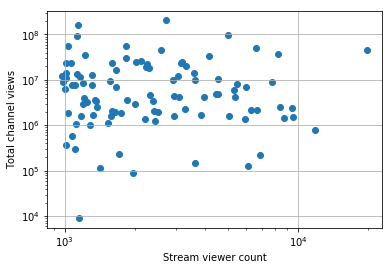

In [24]:
plt.scatter(viewer_count, total_views)
plt.xlabel("Stream viewer count")
plt.ylabel("Total channel views")
plt.grid()
# plt.xscale('log')
# plt.xlim(None, 25000)
plt.loglog()

In [25]:
# import plotly.plotly as py
# from plotly.graph_objs import *



In [26]:
init_notebook_mode(connected=True)

In [32]:
trace.help('text')

Current path: []
Current parent object_names: []

With the current parents, 'text' can be used as follows:

Under ('figure', 'data', 'scatter'):

    description: Sets text elements associated with each (x,y) pair. If a single string, the
        same string appears over all the data points. If an array of string, the
        items are mapped in order to the this trace's (x,y) coordinates. If trace
        `hoverinfo` contains a *text* flag and *hovertext* is not set, these
        elements will be seen in the hover labels.
    editType: calc
    role: info





In [51]:
# Create a trace
trace = go.Scatter(
    x=viewer_count,
    y=total_views,
    mode='markers',
    text=list(map(lambda x: "; ".join(x), zip(
        [
            user_data[_id]['display_name'] for _id in uids
        ],
        [
            user_data[_id]['login'] for _id in uids
        ]
    )))
)

data = [trace]
layout = go.Layout(
    xaxis=dict(
        title="Viewer count (now)",
        type='log',
        autorange=True
    ),
    yaxis=dict(
        title="Total views",
        type='log',
        autorange=True
    )
)
fig = go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
iplot(
    fig,
    filename='basic-scatter',
)

This are just a couple API tests:

In [52]:
params = {
#     'id': '22510310',
    'login': 'tsm_viss'
}
u_r = oauth.get("https://api.twitch.tv/helix/users", headers=headers, params=params)

In [54]:
u_r.json()

{'data': [{'broadcaster_type': 'partner',
   'description': "Hi my names Viss! I'm a full time partnered streamer here on twitch and pro PUBG player for TSM! Live everyday!",
   'display_name': 'TSM_Viss',
   'id': '90020006',
   'login': 'tsm_viss',
   'offline_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/tsm_viss-channel_offline_image-4adbe8b5b71cc7f4-1920x1080.png',
   'profile_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/15ea6088e14b5a50-profile_image-300x300.png',
   'type': '',
   'view_count': 9140827}]}

In [38]:
r1 = oauth.get("https://api.twitch.tv/helix/users", headers=headers, params={"login": "drdisrespectlive"})

In [39]:
r1.json()

{'data': [{'broadcaster_type': 'partner',
   'description': 'The most ruthless competitor in the online gaming community',
   'display_name': 'DrDisRespectLIVE',
   'id': '17337557',
   'login': 'drdisrespectlive',
   'offline_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/drdisrespectlive-channel_offline_image-a79e4923a8019a58-1920x1080.png',
   'profile_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/710c3ca784e2941d-profile_image-300x300.jpeg',
   'type': '',
   'view_count': 43053428}]}

#### Follows

In [68]:
url = "https://api.twitch.tv/helix/users/follows"
params = {
#     "to_id": 17337557,
    "from_id": 17337557,
    "first": 100,
}
r_foll = oauth.get(url, headers=headers, params=params)

In [69]:
r_foll.json().keys()

dict_keys(['total', 'data', 'pagination'])

In [80]:
[
    d.get('to_id') for d in r_foll.json()['data']
]

['46521425',
 '21442544',
 '67650991',
 '37402112',
 '37851229',
 '90020006',
 '21588571',
 '15310631',
 '15564828',
 '89943092',
 '41226075',
 '121059319',
 '21130533',
 '46877634',
 '12338326',
 '54706574',
 '30039402',
 '13240194',
 '43414943',
 '116940538',
 '36769016',
 '49397431',
 '1518077',
 '51496027',
 '8330235',
 '22828020',
 '10406',
 '93656392',
 '101936909',
 '122976394',
 '112057774',
 '26731168',
 '43444398',
 '40992727',
 '108501173',
 '32704681',
 '58612057',
 '102418287',
 '111518512',
 '86254599',
 '80620714',
 '8957332',
 '37120773',
 '42541006',
 '103283035',
 '9563658',
 '43126328',
 '14408894',
 '102909572',
 '55433748',
 '28389533',
 '26429188',
 '24633183',
 '22053765',
 '49303276',
 '41652',
 '79135520',
 '36858184',
 '23057278',
 '9679595',
 '54411072',
 '10397006',
 '21220775',
 '44741426',
 '27241504',
 '49940618',
 '63164470',
 '23161357',
 '26490481',
 '8815236',
 '36125736',
 '19571641',
 '21021016',
 '10086201',
 '27927950']

In [81]:
[
    user_data.get(d.get('to_id')).get('display_name') for d in r_foll.json()['data'] if user_data.get(d.get('to_id')) is not None
]

['NICKMERCS', 'JoshOG', 'Grimmmz']

## Users database crawler

Starting from the active streams, we use the followed channels to gather user data
and fill up a "users" table.

Steps:
- Query the streams API for current streams (up to some lower viewer/absolute limit);
- Query the user API with the obtained user_id from stream data;
- Store user data with a timestamp so that we track when the user was last queried;
- Query the follows API with user ids to find unknown users; populate user_id set

### User data schema

This would be a slight augmentation of twitch's schema for users:
```
{'last_checked': UTC TIMESTAMP,
 'data':
 {'broadcaster_type': 'partner',
  'description': 'Hi there! Come join the stream and live chat with me! I am a hardcore streamer that LOVES every part about it!. Go check out my schedule to see when I am live!',
  'display_name': 'JoshOG',
  'id': '54706574',
  'login': 'joshog',
  'offline_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/d5272c80f9920129-channel_offline_image-1920x1080.png',
  'profile_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/joshog-profile_image-6d908181c1ab37b9-300x300.png',
  'type': '',
  'view_count': 46707913},
}
```